In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Model 1

In [2]:
import numpy as np 
import pandas as pd 
import keras 
from keras.models import Sequential
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
import keras.optimizers
from tensorflow.python.keras.optimizer_v2.adam import Adam
import os
import glob
from skimage.io import imshow, imread, imsave
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
import matplotlib.pyplot as plt
import cv2

In [3]:
p_train=pd.read_csv('/content/drive/train.csv')
p_test=pd.read_csv('/content/drive/test.csv')

target = p_train[['healthy', 'multiple_diseases', 'rust', 'scab']]
test_ids = p_test['image_id']

img_size=224

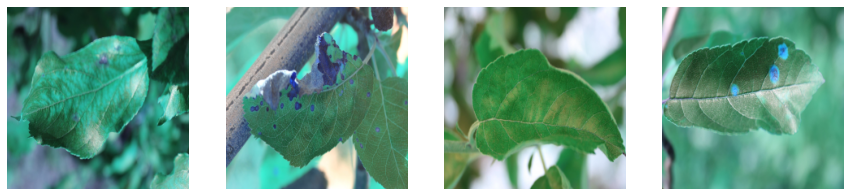

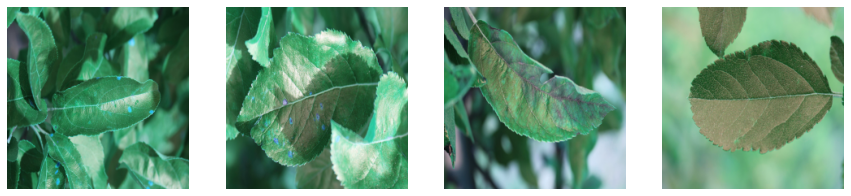

In [4]:
# Direkt görüntüleri listeye aktarmış oluyoruz

train_image=[]
for name in p_train['image_id']:
    path='/content/drive/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_image.append(image)

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(train_image[i])
    
    
test_image=[]
for name in p_test['image_id']:
    path='/content/drive/test_images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(image)

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(test_image[i])    



In [9]:
print(train_image[0].shape)
print(type(train_image[0]))

a = np.array(train_image)
print(a.shape)

(224, 224, 3)
<class 'numpy.ndarray'>
(1821, 224, 224, 3)


In [12]:
#listeden arraye dönüştürüyoruz

#x_train = np.ndarray(train_image) # bu şekilde olmuyor
#x_test = np.ndarray(test_image)
x_train = np.ndarray(shape=(len(train_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in train_image:
    x_train[i]=img_to_array(image)
    x_train[i]=train_image[i]
    i=i+1
x_train=x_train/255 # scale
print('Train Shape: {}'.format(x_train.shape))

Train Shape: (1821, 224, 224, 3)


In [13]:
x_train[0]

array([[[0.05490196, 0.20392157, 0.13333334],
        [0.05882353, 0.21176471, 0.13725491],
        [0.05882353, 0.21960784, 0.13725491],
        ...,
        [0.12156863, 0.25490198, 0.21568628],
        [0.10980392, 0.24313726, 0.20392157],
        [0.10196079, 0.23529412, 0.19607843]],

       [[0.04705882, 0.19607843, 0.1254902 ],
        [0.05490196, 0.20784314, 0.13333334],
        [0.05490196, 0.21568628, 0.13333334],
        ...,
        [0.11372549, 0.24705882, 0.20784314],
        [0.10588235, 0.23921569, 0.2       ],
        [0.10588235, 0.23921569, 0.2       ]],

       [[0.04705882, 0.19215687, 0.12941177],
        [0.05490196, 0.20392157, 0.13333334],
        [0.05490196, 0.21568628, 0.13333334],
        ...,
        [0.10980392, 0.23529412, 0.19607843],
        [0.10588235, 0.23137255, 0.19215687],
        [0.10196079, 0.23529412, 0.19607843]],

       ...,

       [[0.45882353, 0.6862745 , 0.72156864],
        [0.46666667, 0.6784314 , 0.7176471 ],
        [0.4745098 , 0

In [14]:
x_test = np.ndarray(shape=(len(test_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in test_image:
    x_test[i]=img_to_array(image)
    x_test[i]=test_image[i]
    i=i+1
    
x_test=x_test/255 # scale
print('Test Shape: {}'.format(x_test.shape))

Test Shape: (1821, 224, 224, 3)


In [15]:
x_test[0]

array([[[0.20784314, 0.5764706 , 0.38431373],
        [0.20784314, 0.58431375, 0.37254903],
        [0.21568628, 0.5882353 , 0.3764706 ],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07450981, 0.1764706 , 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20784314, 0.5803922 , 0.38431373],
        [0.21176471, 0.5921569 , 0.38039216],
        [0.21176471, 0.58431375, 0.37254903],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20392157, 0.58431375, 0.38039216],
        [0.20784314, 0.59607846, 0.3764706 ],
        [0.2       , 0.58431375, 0.36862746],
        ...,
        [0.07058824, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       ...,

       [[0.08235294, 0.20784314, 0.11372549],
        [0.08235294, 0.20392157, 0.11372549],
        [0.08235294, 0

In [16]:
y = p_train.copy()
del y['image_id'] # image_id kolonunu sildik
y.head()

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [17]:
y_train = np.array(y.values)
print(y_train.shape,y_train[0])


(1821, 4) [0 0 0 1]


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1456, 224, 224, 3), (365, 224, 224, 3), (1456, 4), (365, 4))

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

LR_reduce=ReduceLROnPlateau(monitor='val_accuracy',
                            factor=.5,
                            patience=10,
                            min_lr=.000001,
                            verbose=1)

ES_monitor=EarlyStopping(monitor='val_loss',
                          patience=20)



In [ ]:
model2 = Sequential()

#1. evrişim katmanı
model2.add(Conv2D(128, (5, 5), activation='LeakyReLU', input_shape=(224,224,3))) 
model2.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
#64den 128 

#2. Evrişim katmanı
model2.add(Conv2D(256, (3, 3), activation='LeakyReLU')) #128 den 256
model2.add(Conv2D(256, (3, 3), activation='LeakyReLU'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))



#3. Evrişim katmanı
model2.add(Conv2D(512, (3, 3), activation='LeakyReLU')) #256 dan 512
model2.add(Conv2D(512, (3, 3), activation='LeakyReLU'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))


model2.add(Flatten())

# Tam bağlantı katmanı
model2.add(Dense(1024, activation='LeakyReLU'))
#model2.add(Dropout(0.1))
model2.add(Dense(1024, activation='LeakyReLU'))
#model2.add(Dropout(0.1))

model2.add(Dense(1, activation='softmax')) 
#------------------------------
model2.summary()

#------------------------------
opt = keras.optimizers.Adam(learning_rate=0.3)
#adam = Adam() #tf.keras.optimizers.Adam(learning_rate=0.1)
model2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
)







Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 256)     295168    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 104, 104, 256)     590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 51, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 512)       1180160   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 512)       2

In [ ]:
"""ImageDataGenerator, Keras'ın derin öğrenme için görüntü verilerinin ardışık düzenlenmesi için başvurduğu sınıftır. 
Yerel dosya sisteminize kolay erişim ve farklı yapılardan veri yüklemek için birden fazla farklı yöntem sağlar. 
Ayrıca oldukça güçlü veri ön işleme ve artırma yeteneklerine sahiptir"""

datagen = ImageDataGenerator(rotation_range=45,
                             shear_range=0.25,
                              zoom_range=0.25,
                              width_shift_range=0.25,
                              height_shift_range=0.25,
                              rescale=1/255,
                              brightness_range=[0.5,1.5],
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest'
#                              featurewise_center=True,
#                              samplewise_center=True,
#                              featurewise_std_normalization=True,
#                              samplewise_std_normalization=True,
#                              zca_whitening=True
                              )


In [ ]:
from keras.callbacks import ModelCheckpoint

root = '/content/drive/'
checkpointer = ModelCheckpoint(filepath=root + 'data/plant_disease_model.h5', verbose=1, save_best_only=True)


In [ ]:

history = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=24), # train verileri için veri artırma
                              epochs=300,
                              steps_per_epoch=x_train.shape[0] // 24,
                              verbose=1,
                              callbacks=[ES_monitor,LR_reduce],
                              validation_data=datagen.flow(x_val, y_val,batch_size=24), # validation verileri için veri artırma
                              validation_steps=x_val.shape[0]//24
                              )



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
60/60 [==============================] - 36s 602ms/step - loss: 1270.8936 - accuracy: 0.6922 - val_loss: 9.1451 - val_accuracy: 0.6542
Epoch 2/300
60/60 [==============================] - 36s 604ms/step - loss: 18.3892 - accuracy: 0.6617 - val_loss: 134.3486 - val_accuracy: 0.6653
Epoch 3/300
60/60 [==============================] - 37s 617ms/step - loss: 329.6972 - accuracy: 0.6568 - val_loss: 663.8395 - val_accuracy: 0.5250
Epoch 4/300
60/60 [==============================] - 37s 618ms/step - loss: 252.2223 - accuracy: 0.6694 - val_loss: 7.3713 - val_accuracy: 0.6736
Epoch 5/300
60/60 [==============================] - 38s 622ms/step - loss: 259.5420 - accuracy: 0.6568 - val_loss: 6.3848 - val_accuracy: 0.6639
Epoch 6/300
60/60 [==============================] - 38s 622ms/step - loss: 837.6084 - accuracy: 0.6763 - val_loss: 5.4332 - val_accuracy: 0.6444
Epoch 7/300
60/60 [==============================] - 38s 634ms/step - loss: 5.3615 - accuracy: 0.6700 - val_loss: 27.862

KeyboardInterrupt: ignored

In [ ]:
x_train[0]

array([[[0.09803922, 0.21176471, 0.10980392],
        [0.09803922, 0.21568628, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.13725491, 0.3137255 , 0.23137255],
        [0.12156863, 0.30980393, 0.20784314],
        [0.10980392, 0.29803923, 0.19607843]],

       [[0.09803922, 0.21176471, 0.10980392],
        [0.09803922, 0.21568628, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.13333334, 0.3137255 , 0.21960784],
        [0.11764706, 0.30980393, 0.19607843],
        [0.10980392, 0.30588236, 0.19215687]],

       [[0.09803922, 0.21568628, 0.10980392],
        [0.10196079, 0.21960784, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.12156863, 0.30980393, 0.19607843],
        [0.10980392, 0.30588236, 0.18039216],
        [0.10588235, 0.3019608 , 0.1764706 ]],

       ...,

       [[0.17254902, 0.23921569, 0.19607843],
        [0.16078432, 0.23137255, 0.1764706 ],
        [0.22352941, 0

In [ ]:
x_test[0]

array([[[0.20784314, 0.5764706 , 0.38431373],
        [0.20784314, 0.58431375, 0.37254903],
        [0.21568628, 0.5882353 , 0.3764706 ],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07450981, 0.1764706 , 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20784314, 0.5803922 , 0.38431373],
        [0.21176471, 0.5921569 , 0.38039216],
        [0.21176471, 0.58431375, 0.37254903],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20392157, 0.58431375, 0.38039216],
        [0.20784314, 0.59607846, 0.3764706 ],
        [0.2       , 0.58431375, 0.36862746],
        ...,
        [0.07058824, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       ...,

       [[0.08235294, 0.20784314, 0.11372549],
        [0.08235294, 0.20392157, 0.11372549],
        [0.08235294, 0

In [ ]:
model_json = model2.to_json()
with open(root + "data/plant_disease_model.json", "w") as json_file:
    json_file.write(model_json)

FileNotFoundError: ignored

In [ ]:
from matplotlib import pyplot as plt

h = history.history

offset = 5
epochs = range(offset, len(h['loss']))

plt.figure(1, figsize=(20, 6))

plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, h['loss'][offset:], label='train')
plt.plot(epochs, h['val_loss'][offset:], label='val')
plt.legend()

plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(h[f'accuracy'], label='train')
plt.plot(h[f'val_accuracy'], label='val')
plt.legend()

plt.show()

from sklearn.metrics import roc_auc_score

pred_test = model2.predict(x_val)
roc_sum = 0
for i in range(4):
    score = roc_auc_score(y_val[:, i], pred_test[:, i])
    roc_sum += score
    print(f'{score:.3f}')

roc_sum /= 4
print(f'totally:{roc_sum:.3f}')

NameError: ignored

In [ ]:
pred = model2.predict(x_test)

res = pd.DataFrame()
res['image_id'] = test_ids
res['healthy'] = pred[:, 0]
res['multiple_diseases'] = pred[:, 1]
res['rust'] = pred[:, 2]
res['scab'] = pred[:, 3]
res.to_csv('Mysubmission.csv', index=False)
res.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,1.893763e-08,0.053263,9.467367e-01,7.158166e-10
1,Test_1,2.923143e-14,0.002621,9.973794e-01,1.559897e-13
2,Test_2,2.785601e-06,0.004236,6.494106e-07,9.957606e-01
3,Test_3,9.998428e-01,0.000025,1.033672e-04,2.847593e-05
4,Test_4,1.840841e-12,0.024644,9.753562e-01,1.387505e-13
5,Test_5,9.459056e-01,0.026972,3.056412e-03,2.406580e-02
6,Test_6,9.910840e-01,0.000970,7.587354e-03,3.589951e-04
7,Test_7,4.324219e-09,0.011161,6.468711e-07,9.888389e-01
8,Test_8,8.577115e-05,0.957778,8.442629e-04,4.129234e-02
9,Test_9,2.055542e-05,0.025508,9.744707e-01,8.032182e-07


In [ ]:
model2.load_weights(root + 'data/face_model.h5')

# MODEL 2

In [22]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

LR_reduce=ReduceLROnPlateau(monitor='val_accuracy',
                            factor=.5,
                            patience=10,
                            min_lr=.000001,
                            verbose=1)

ES_monitor=EarlyStopping(monitor='val_loss',
                          patience=20)


In [25]:
model3 = Sequential()

#1. evrişim katmanı
model3.add(Conv2D(128, (5, 5), activation='ReLU', input_shape=(224,224,3))) 
model3.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
#64den 128 

#2. Evrişim katmanı
model3.add(Conv2D(256, (3, 3), activation='ReLU')) #128 den 256
model3.add(Conv2D(256, (3, 3), activation='ReLU'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model3.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))



#3. Evrişim katmanı
model3.add(Conv2D(512, (3, 3), activation='ReLU')) #256 dan 512
model3.add(Conv2D(512, (3, 3), activation='ReLU'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model3.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))


model3.add(Flatten())

# Tam bağlantı katmanı
model3.add(Dense(1024, activation='ReLU'))
model3.add(Dropout(0.25))
model3.add(Dense(1024, activation='ReLU'))
model3.add(Dropout(0.25))

model3.add(Dense(1, activation='softmax')) 
#------------------------------
model3.summary()

#------------------------------
#opt = keras.optimizers.Adam(learning_rate=0.3)
#adam = Adam() #tf.keras.optimizers.Adam(learning_rate=0.1)
model3.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

#------------------------------





Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 220, 220, 128)     9728      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 108, 108, 128)     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 106, 106, 256)     295168    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 104, 104, 256)     590080    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 51, 51, 256)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 49, 49, 512)       1180160   
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 47, 47, 512)      

In [26]:
"""ImageDataGenerator, Keras'ın derin öğrenme için görüntü verilerinin ardışık düzenlenmesi için başvurduğu sınıftır. 
Yerel dosya sisteminize kolay erişim ve farklı yapılardan veri yüklemek için birden fazla farklı yöntem sağlar. 
Ayrıca oldukça güçlü veri ön işleme ve artırma yeteneklerine sahiptir"""

datagen = ImageDataGenerator(rotation_range=45,
                             shear_range=0.25,
                              zoom_range=0.25,
                              width_shift_range=0.25,
                              height_shift_range=0.25,
                              rescale=1/255,
                              brightness_range=[0.5,1.5],
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest'
#                              featurewise_center=True,
#                              samplewise_center=True,
#                              featurewise_std_normalization=True,
#                              samplewise_std_normalization=True,
#                              zca_whitening=True
                              )


In [30]:
from keras.callbacks import ModelCheckpoint

root = '/content/drive/'
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'plant_model.h5', verbose=1, save_best_only=True)



history = model3.fit_generator(datagen.flow(x_train, y_train, batch_size=24), # train verileri için veri artırma
                              epochs=300,
                              steps_per_epoch=x_train.shape[0] // 24,
                              verbose=1,
                              callbacks=[ES_monitor,LR_reduce],
                              validation_data=datagen.flow(x_val, y_val,batch_size=24), # validation verileri için veri artırma
                              validation_steps=x_val.shape[0]//24
                              )

# save model to json
model_json = model3.to_json()
with open(root + "plant_model.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
60/60 [==============================] - 46s 690ms/step - loss: 162.7825 - accuracy: 0.7360 - val_loss: 1.2660 - val_accuracy: 0.7500
Epoch 2/300
60/60 [==============================] - 34s 555ms/step - loss: 1.2983 - accuracy: 0.7469 - val_loss: 1.5071 - val_accuracy: 0.7500
Epoch 3/300
60/60 [==============================] - 34s 561ms/step - loss: 1.2710 - accuracy: 0.7491 - val_loss: 1.2504 - val_accuracy: 0.7500
Epoch 4/300
60/60 [==============================] - 33s 548ms/step - loss: 1.2989 - accuracy: 0.7458 - val_loss: 1.2703 - val_accuracy: 0.7500
Epoch 5/300
60/60 [==============================] - 33s 553ms/step - loss: 1.3024 - accuracy: 0.7460 - val_loss: 2.1958 - val_accuracy: 0.6639
Epoch 6/300
60/60 [==============================] - 33s 539ms/step - loss: 1.3886 - accuracy: 0.7462 - val_loss: 1.2433 - val_accuracy: 0.7500
Epoch 7/300
60/60 [==============================] - 33s 553ms/step - loss: 1.2606 - accuracy: 0.7481 - val_loss: 1.2457 - val_accurac

In [31]:
x_train[0]

array([[[0.09803922, 0.21176471, 0.10980392],
        [0.09803922, 0.21568628, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.13725491, 0.3137255 , 0.23137255],
        [0.12156863, 0.30980393, 0.20784314],
        [0.10980392, 0.29803923, 0.19607843]],

       [[0.09803922, 0.21176471, 0.10980392],
        [0.09803922, 0.21568628, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.13333334, 0.3137255 , 0.21960784],
        [0.11764706, 0.30980393, 0.19607843],
        [0.10980392, 0.30588236, 0.19215687]],

       [[0.09803922, 0.21568628, 0.10980392],
        [0.10196079, 0.21960784, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.12156863, 0.30980393, 0.19607843],
        [0.10980392, 0.30588236, 0.18039216],
        [0.10588235, 0.3019608 , 0.1764706 ]],

       ...,

       [[0.17254902, 0.23921569, 0.19607843],
        [0.16078432, 0.23137255, 0.1764706 ],
        [0.22352941, 0

In [32]:
x_test[0]

array([[[0.20784314, 0.5764706 , 0.38431373],
        [0.20784314, 0.58431375, 0.37254903],
        [0.21568628, 0.5882353 , 0.3764706 ],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07450981, 0.1764706 , 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20784314, 0.5803922 , 0.38431373],
        [0.21176471, 0.5921569 , 0.38039216],
        [0.21176471, 0.58431375, 0.37254903],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20392157, 0.58431375, 0.38039216],
        [0.20784314, 0.59607846, 0.3764706 ],
        [0.2       , 0.58431375, 0.36862746],
        ...,
        [0.07058824, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       ...,

       [[0.08235294, 0.20784314, 0.11372549],
        [0.08235294, 0.20392157, 0.11372549],
        [0.08235294, 0

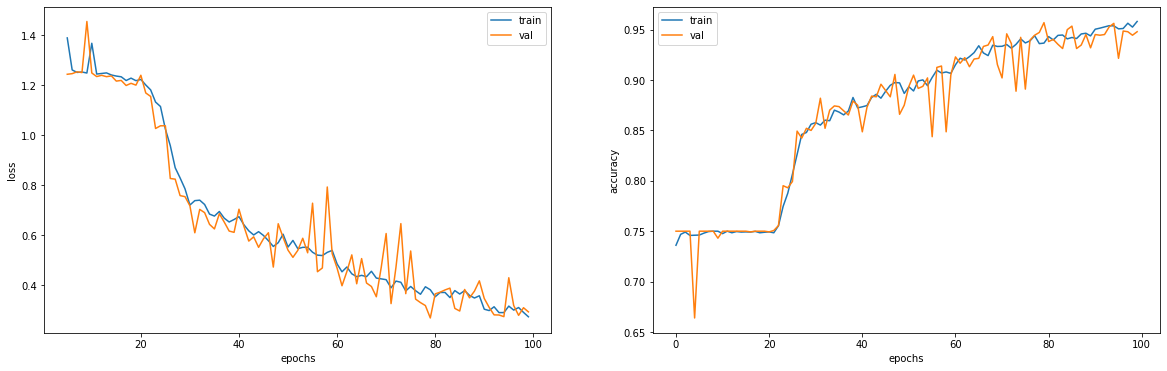

0.991
0.947
0.998
0.990
totally:0.981


In [34]:
from matplotlib import pyplot as plt

h = history.history

offset = 5
epochs = range(offset, len(h['loss']))

plt.figure(1, figsize=(20, 6))

plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, h['loss'][offset:], label='train')
plt.plot(epochs, h['val_loss'][offset:], label='val')
plt.legend()

plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(h[f'accuracy'], label='train')
plt.plot(h[f'val_accuracy'], label='val')
plt.legend()

plt.show()

from sklearn.metrics import roc_auc_score

print("ROC-AUC SCORE")
pred_test = model3.predict(x_val)
roc_sum = 0
for i in range(4):
    score = roc_auc_score(y_val[:, i], pred_test[:, i])
    roc_sum += score
    print(f'{score:.3f}')

roc_sum /= 4
print(f'totally:{roc_sum:.3f}')

In [35]:
pred = model3.predict(x_test)

res = pd.DataFrame()
res['image_id'] = test_ids
res['healthy'] = pred[:, 0]
res['multiple_diseases'] = pred[:, 1]
res['rust'] = pred[:, 2]
res['scab'] = pred[:, 3]
res.to_csv('Mysubmission2.csv', index=False)
res.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,7.537644e-07,0.004478,0.995522,3.246862e-10
1,Test_1,1.151030e-07,0.005830,0.994170,8.632105e-11
2,Test_2,2.150466e-02,0.024168,0.000491,9.538360e-01
3,Test_3,9.631917e-01,0.007587,0.005742,2.347908e-02
4,Test_4,4.472500e-17,0.000011,0.999990,1.402785e-24
5,Test_5,1.434922e-01,0.119051,0.021155,7.163026e-01
6,Test_6,9.893830e-01,0.002161,0.002079,6.377649e-03
7,Test_7,2.475011e-03,0.034336,0.000230,9.629594e-01
8,Test_8,1.942645e-03,0.017455,0.000084,9.805187e-01
9,Test_9,8.010015e-07,0.029805,0.970194,1.535147e-08


# MODEL 1 TEKRAR

In [37]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

LR_reduce=ReduceLROnPlateau(monitor='val_accuracy',
                            factor=.5,
                            patience=10,
                            min_lr=.000001,
                            verbose=1)

ES_monitor=EarlyStopping(monitor='val_loss',
                          patience=20)

#reg = .0005

In [38]:
model2_2 = Sequential()

#1. evrişim katmanı
model2_2.add(Conv2D(128, (5, 5), activation='LeakyReLU', input_shape=(224,224,3))) 
model2_2.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
#64den 128 

#2. Evrişim katmanı
model2_2.add(Conv2D(256, (3, 3), activation='LeakyReLU')) #128 den 256
model2_2.add(Conv2D(256, (3, 3), activation='LeakyReLU'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model2_2.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))



#3. Evrişim katmanı
model2_2.add(Conv2D(512, (3, 3), activation='LeakyReLU')) #256 dan 512
model2_2.add(Conv2D(512, (3, 3), activation='LeakyReLU'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model2_2.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))


model2_2.add(Flatten())

# Tam bağlantı katmanı
model2_2.add(Dense(1024, activation='LeakyReLU'))
#model2.add(Dropout(0.1))
model2_2.add(Dense(1024, activation='LeakyReLU'))
#model2.add(Dropout(0.1))

model2_2.add(Dense(1, activation='softmax')) 
#------------------------------
model2_2.summary()

#------------------------------
#opt = keras.optimizers.Adam(learning_rate=0.3)
#adam = Adam() #tf.keras.optimizers.Adam(learning_rate=0.1)
model2_2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

#------------------------------





Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 220, 220, 128)     9728      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 108, 108, 128)     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 106, 106, 256)     295168    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 104, 104, 256)     590080    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 51, 51, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 49, 49, 512)       1180160   
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 47, 47, 512)      

In [39]:
"""ImageDataGenerator, Keras'ın derin öğrenme için görüntü verilerinin ardışık düzenlenmesi için başvurduğu sınıftır. 
Yerel dosya sisteminize kolay erişim ve farklı yapılardan veri yüklemek için birden fazla farklı yöntem sağlar. 
Ayrıca oldukça güçlü veri ön işleme ve artırma yeteneklerine sahiptir"""

datagen = ImageDataGenerator(rotation_range=45,
                             shear_range=0.25,
                              zoom_range=0.25,
                              width_shift_range=0.25,
                              height_shift_range=0.25,
                              rescale=1/255,
                              brightness_range=[0.5,1.5],
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest'
#                              featurewise_center=True,
#                              samplewise_center=True,
#                              featurewise_std_normalization=True,
#                              samplewise_std_normalization=True,
#                              zca_whitening=True
                              )


In [41]:
from keras.callbacks import ModelCheckpoint

root = '/content/drive/'
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'data/plant_model2.h5', verbose=1, save_best_only=True)



history = model2_2.fit_generator(datagen.flow(x_train, y_train, batch_size=24), # train verileri için veri artırma
                              epochs=300,
                              steps_per_epoch=x_train.shape[0] // 24,
                              verbose=1,
                              callbacks=[ES_monitor,LR_reduce],
                              validation_data=datagen.flow(x_val, y_val,batch_size=24), # validation verileri için veri artırma
                              validation_steps=x_val.shape[0]//24
                              )

# save model to json
model_json = model2_2.to_json()
with open(root + "data/plant_model2.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
60/60 [==============================] - 38s 635ms/step - loss: 1493.8292 - accuracy: 0.6493 - val_loss: 1.2619 - val_accuracy: 0.7535
Epoch 2/300
60/60 [==============================] - 36s 600ms/step - loss: 606.9470 - accuracy: 0.6816 - val_loss: 1.4975 - val_accuracy: 0.7090
Epoch 3/300
60/60 [==============================] - 37s 608ms/step - loss: 1124.8967 - accuracy: 0.6842 - val_loss: 246.3020 - val_accuracy: 0.6639
Epoch 4/300
60/60 [==============================] - 37s 610ms/step - loss: 40.5979 - accuracy: 0.6550 - val_loss: 1.6747 - val_accuracy: 0.6847
Epoch 5/300
60/60 [==============================] - 37s 619ms/step - loss: 530.7133 - accuracy: 0.6716 - val_loss: 2.6128 - val_accuracy: 0.6799
Epoch 6/300
60/60 [==============================] - 37s 620ms/step - loss: 22.0306 - accuracy: 0.6631 - val_loss: 1.9194 - val_accuracy: 0.7382
Epoch 7/300
60/60 [==============================] - 38s 625ms/step - loss: 172.6847 - accuracy: 0.6990 - val_loss: 3.0773

NameError: ignored

In [42]:
x_train[0]

array([[[0.09803922, 0.21176471, 0.10980392],
        [0.09803922, 0.21568628, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.13725491, 0.3137255 , 0.23137255],
        [0.12156863, 0.30980393, 0.20784314],
        [0.10980392, 0.29803923, 0.19607843]],

       [[0.09803922, 0.21176471, 0.10980392],
        [0.09803922, 0.21568628, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.13333334, 0.3137255 , 0.21960784],
        [0.11764706, 0.30980393, 0.19607843],
        [0.10980392, 0.30588236, 0.19215687]],

       [[0.09803922, 0.21568628, 0.10980392],
        [0.10196079, 0.21960784, 0.10980392],
        [0.09803922, 0.21960784, 0.10588235],
        ...,
        [0.12156863, 0.30980393, 0.19607843],
        [0.10980392, 0.30588236, 0.18039216],
        [0.10588235, 0.3019608 , 0.1764706 ]],

       ...,

       [[0.17254902, 0.23921569, 0.19607843],
        [0.16078432, 0.23137255, 0.1764706 ],
        [0.22352941, 0

In [43]:
x_test[0]

array([[[0.20784314, 0.5764706 , 0.38431373],
        [0.20784314, 0.58431375, 0.37254903],
        [0.21568628, 0.5882353 , 0.3764706 ],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07450981, 0.1764706 , 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20784314, 0.5803922 , 0.38431373],
        [0.21176471, 0.5921569 , 0.38039216],
        [0.21176471, 0.58431375, 0.37254903],
        ...,
        [0.06666667, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       [[0.20392157, 0.58431375, 0.38039216],
        [0.20784314, 0.59607846, 0.3764706 ],
        [0.2       , 0.58431375, 0.36862746],
        ...,
        [0.07058824, 0.16862746, 0.10588235],
        [0.07843138, 0.18039216, 0.10980392],
        [0.07843138, 0.18039216, 0.10980392]],

       ...,

       [[0.08235294, 0.20784314, 0.11372549],
        [0.08235294, 0.20392157, 0.11372549],
        [0.08235294, 0

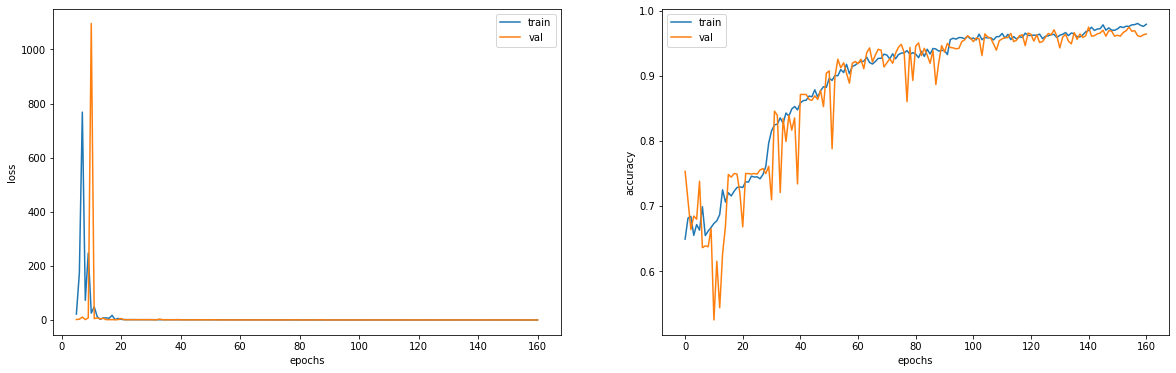

0.994
0.963
0.998
0.994
totally:0.987


In [44]:
from matplotlib import pyplot as plt

h = history.history

offset = 5
epochs = range(offset, len(h['loss']))

plt.figure(1, figsize=(20, 6))

plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, h['loss'][offset:], label='train')
plt.plot(epochs, h['val_loss'][offset:], label='val')
plt.legend()

plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(h[f'accuracy'], label='train')
plt.plot(h[f'val_accuracy'], label='val')
plt.legend()

plt.show()

from sklearn.metrics import roc_auc_score

pred_test = model2_2.predict(x_val)
roc_sum = 0
for i in range(4):
    score = roc_auc_score(y_val[:, i], pred_test[:, i])
    roc_sum += score
    print(f'{score:.3f}')

roc_sum /= 4
print(f'totally:{roc_sum:.3f}')

In [45]:
pred = model2_2.predict(x_test)

res = pd.DataFrame()
res['image_id'] = test_ids
res['healthy'] = pred[:, 0]
res['multiple_diseases'] = pred[:, 1]
res['rust'] = pred[:, 2]
res['scab'] = pred[:, 3]
res.to_csv('Mysubmission3.csv', index=False)
res.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,1.469694e-12,0.002875,9.971249e-01,2.959726e-12
1,Test_1,1.439286e-13,0.001648,9.983521e-01,2.643074e-13
2,Test_2,1.626476e-07,0.000292,3.899963e-08,9.997080e-01
3,Test_3,9.999149e-01,0.000010,3.439762e-05,4.098632e-05
4,Test_4,1.046500e-13,0.066442,9.335582e-01,2.600752e-13
5,Test_5,9.190125e-01,0.021818,2.118219e-03,5.705119e-02
6,Test_6,9.951583e-01,0.000309,3.639342e-03,8.937690e-04
7,Test_7,7.538167e-07,0.004044,4.503970e-06,9.959506e-01
8,Test_8,1.917405e-04,0.958392,1.103253e-02,3.038357e-02
9,Test_9,2.070426e-07,0.046338,9.536620e-01,2.016454e-08
